In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 5.48 μs


In [3]:
# configuration settings
data_root = '../data/phantom_lung_1000'
mesh_radius = 10
num_levels = 3
num_conv_layers = 2
conv_channels = 8
conv_kernel_size = 3
output_func = 'relu'
batch_size = 2
learning_rate = 1e-5

save_every = 10
save_prefix = '2024-10-29__lung'
#save_prefix = f'2024-09-30__initial/train__batch_size__{mesh_radius}__{interp_radius}__{interp_sigma}__{output_func}__{batch_size}/'
load_epoch = 0

Loading ../data/phantom_lung_1000/phantom5/phantom5_anat.nii.gz
Loading ../data/phantom_lung_1000/phantom5/phantom5_elast.nii.gz
Loading ../data/phantom_lung_1000/phantom5/phantom5_disp.nii.gz
Loading ../data/phantom_lung_1000/phantom5/phantom5_mask.nii.gz
CT


<IPython.core.display.Javascript object>


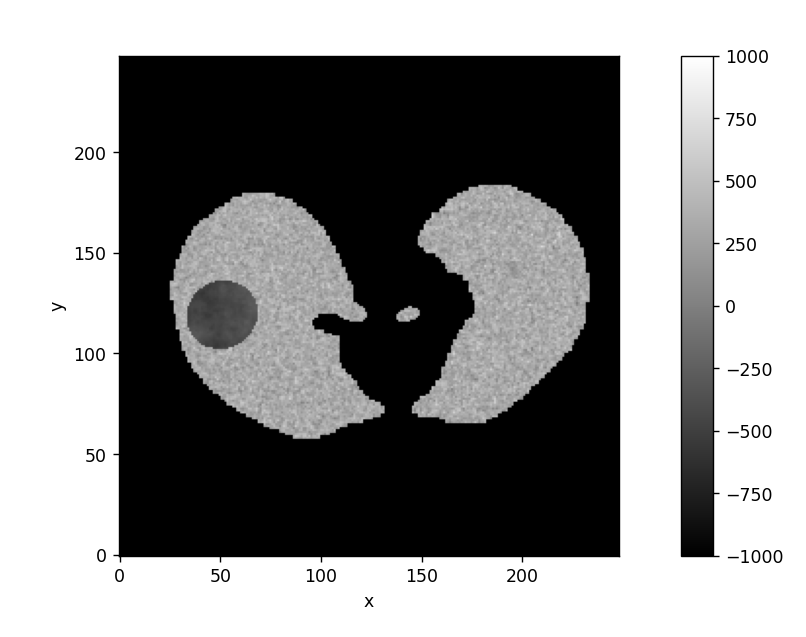

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

elasticity


<IPython.core.display.Javascript object>


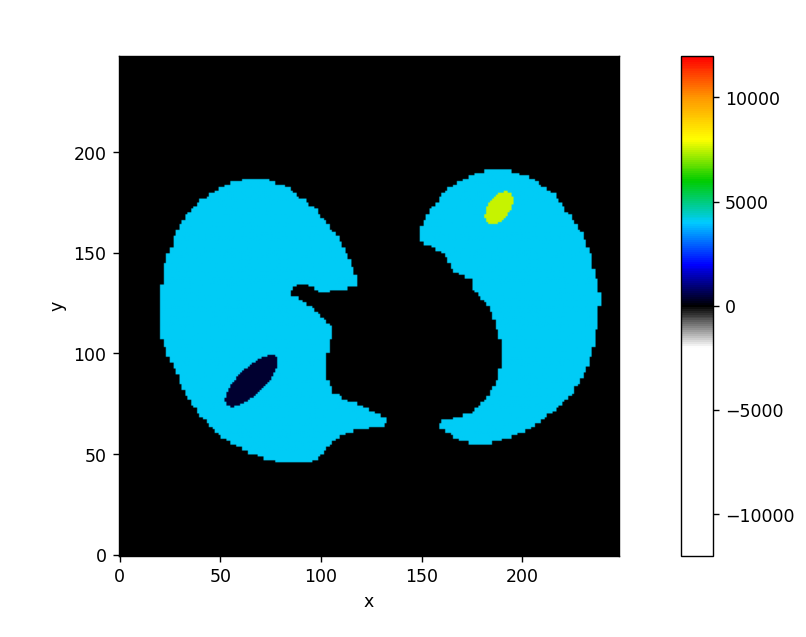

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

displacement


<IPython.core.display.Javascript object>


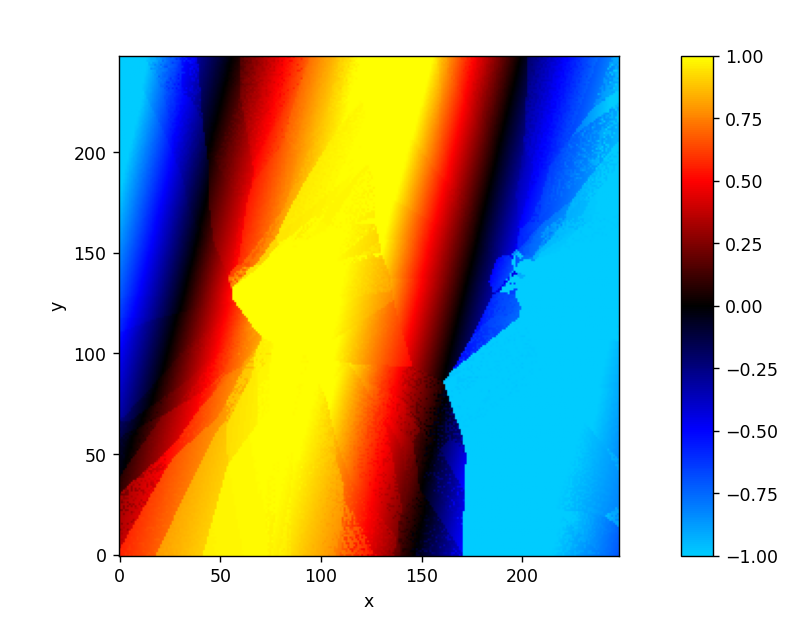

interactive(children=(SelectionSlider(description='z', options=((0.0, 0), (2.5, 1), (5.0, 2), (7.5, 3), (10.0,…

Loading ../data/phantom_lung_1000/phantom5/phantom5_mesh10.xdmf
Loading ../data/phantom_lung_1000/phantom5/phantom5_mesh10.xdmf... 5070


In [5]:
%autoreload
phantom_set = project.phantom.PhantomSet(data_root, num_phantoms=100)
phantom = phantom_set[5]
phantom.load_niftis()
project.visual.XArrayViewer(phantom.anat)
project.visual.XArrayViewer(phantom.elast)
project.visual.XArrayViewer(phantom.disp)
phantom.load_mesh(10)
phantom.mesh

In [11]:
all_examples = phantom_set.get_examples(mesh_radius)
train_examples = all_examples[10:]
test_examples = all_examples[:10]
len(train_examples), len(test_examples)

(90, 10)

In [12]:
all_examples[0]

{'name': 'phantom0',
 'anat_file': PosixPath('../data/phantom_lung_1000/phantom0/phantom0_anat.nii.gz'),
 'elast_file': PosixPath('../data/phantom_lung_1000/phantom0/phantom0_elast.nii.gz'),
 'disp_file': PosixPath('../data/phantom_lung_1000/phantom0/phantom0_disp.nii.gz'),
 'mask_file': PosixPath('../data/phantom_lung_1000/phantom0/phantom0_mask.nii.gz'),
 'mesh_file': PosixPath('../data/phantom_lung_1000/phantom0/phantom0_mesh10.xdmf'),
 'mesh_radius': 10}

In [13]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset(test_examples)

In [41]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [59]:
%autoreload
trainer = project.training.Trainer(
    model=model,
    train_data=train_data,
    test_data=test_data,
    batch_size=batch_size,
    learning_rate=learning_rate,
    save_every=save_every,
    save_prefix=save_prefix,
    sync_cuda=True
)

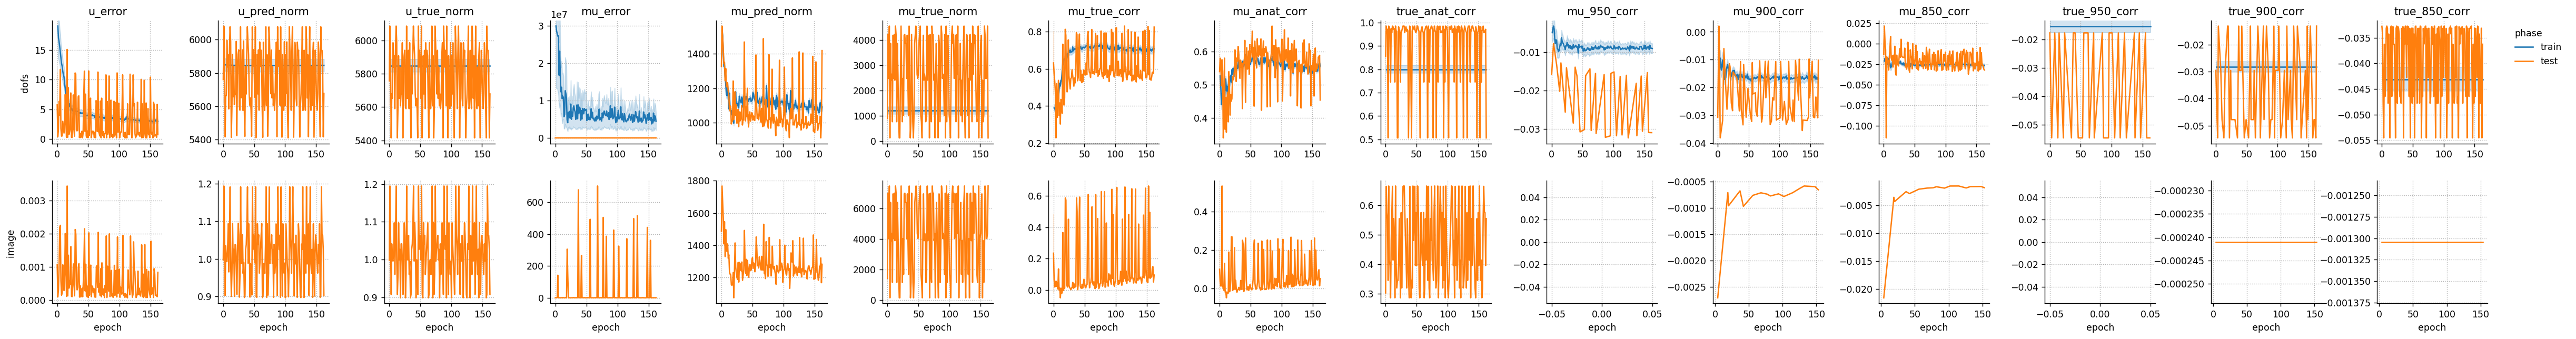

In [52]:
trainer.metric_viewer.fig

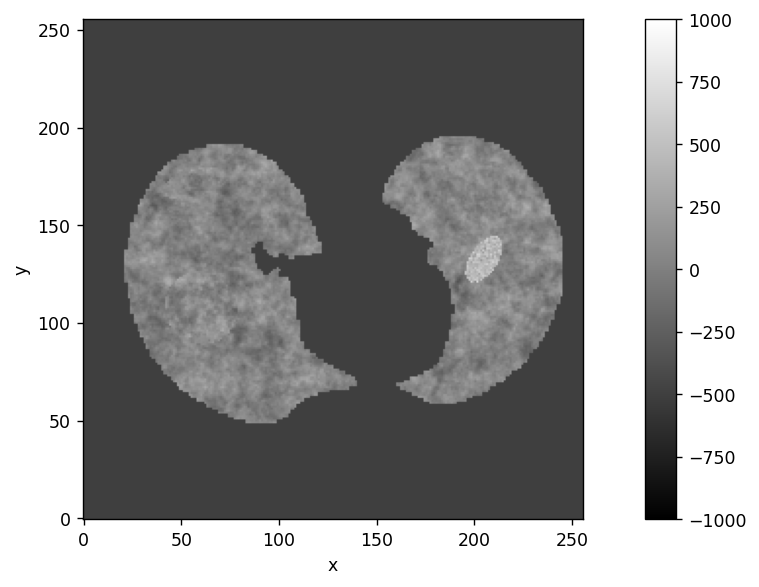

In [55]:
trainer.array_viewers['anat'].fig

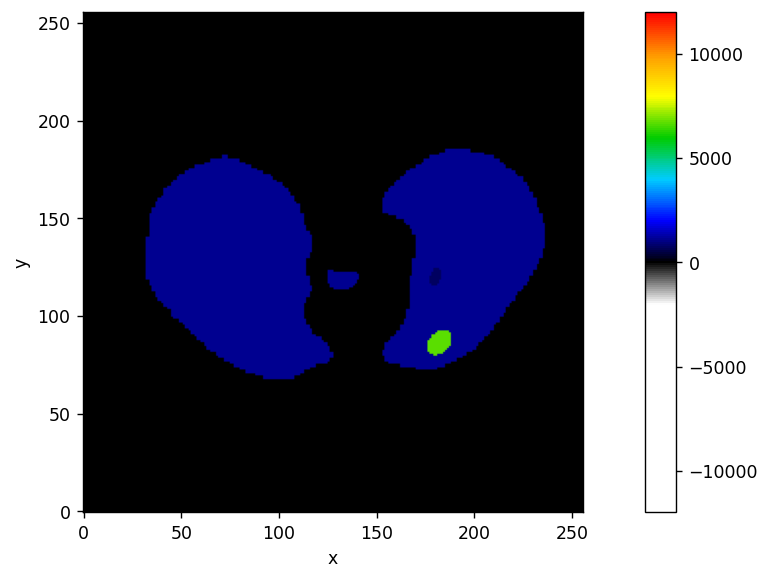

In [57]:
trainer.array_viewers['mu_true'].fig

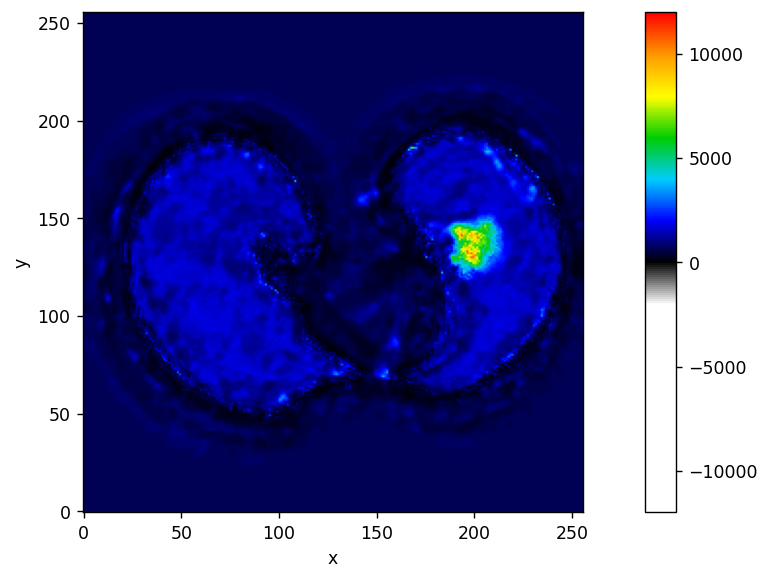

In [58]:
trainer.array_viewers['mu_pred'].fig

In [43]:
if load_epoch:
    trainer.load_state(epoch=load_epoch)

['phantom7'].

<IPython.core.display.Javascript object>


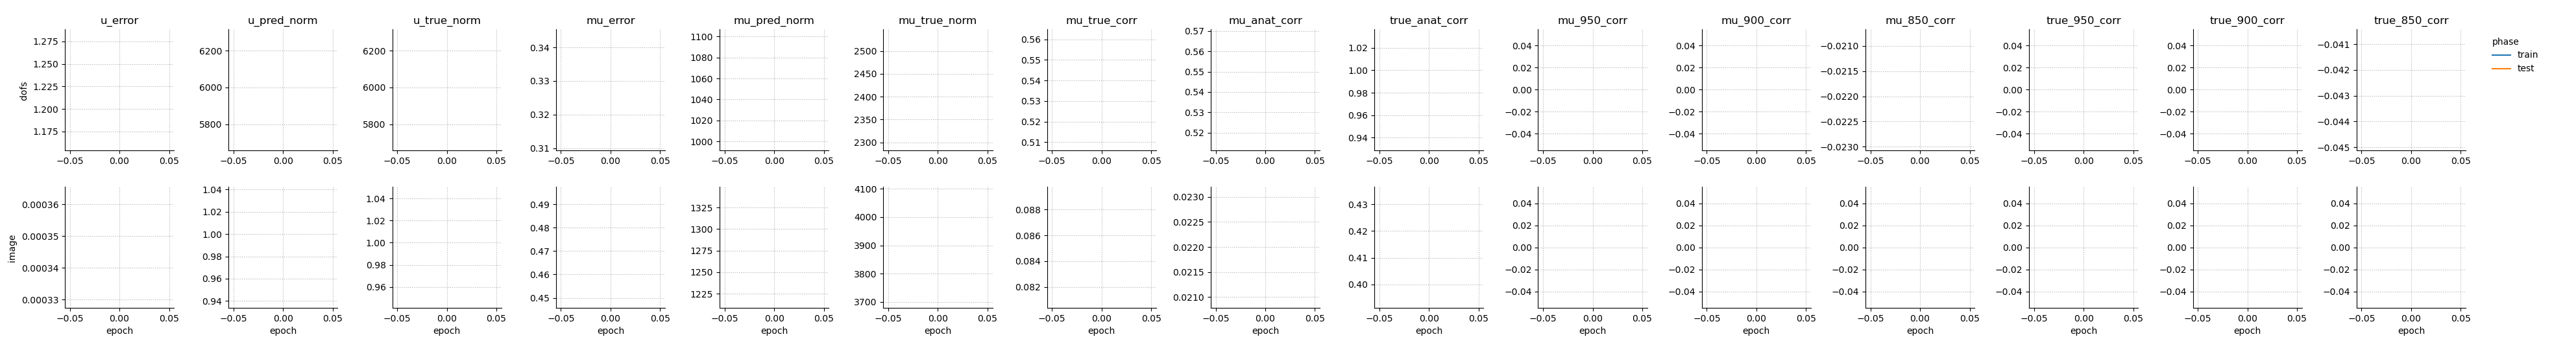

anat


<IPython.core.display.Javascript object>


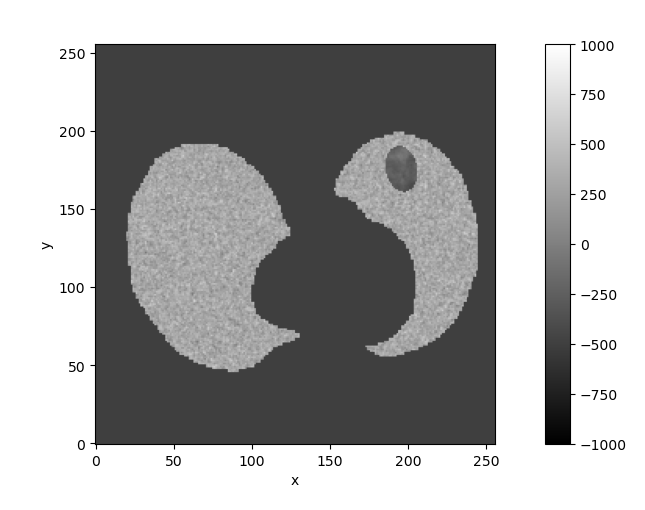

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

emph


<IPython.core.display.Javascript object>


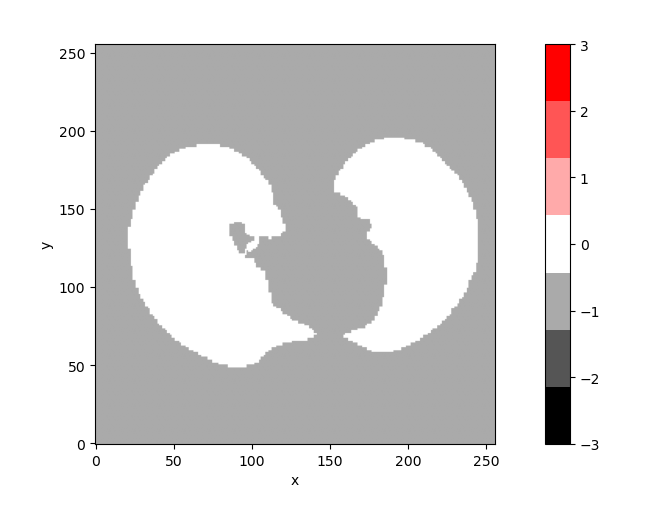

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_pred


<IPython.core.display.Javascript object>


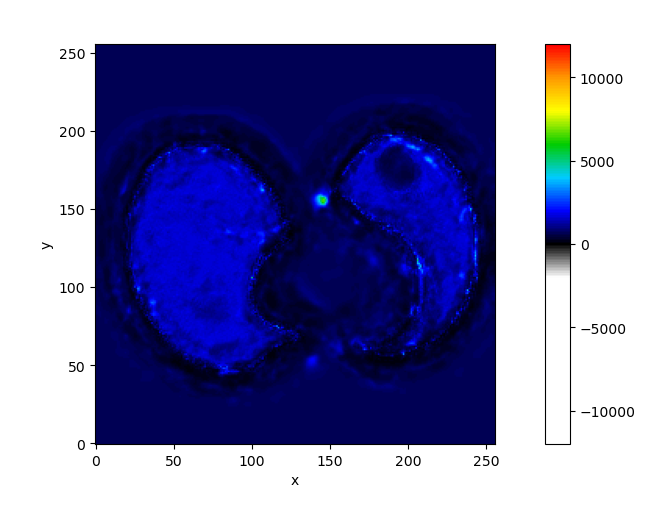

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_true


<IPython.core.display.Javascript object>


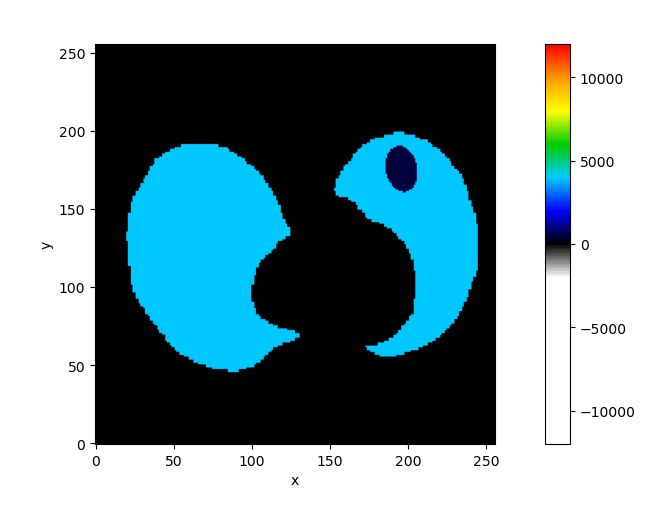

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_pred


<IPython.core.display.Javascript object>


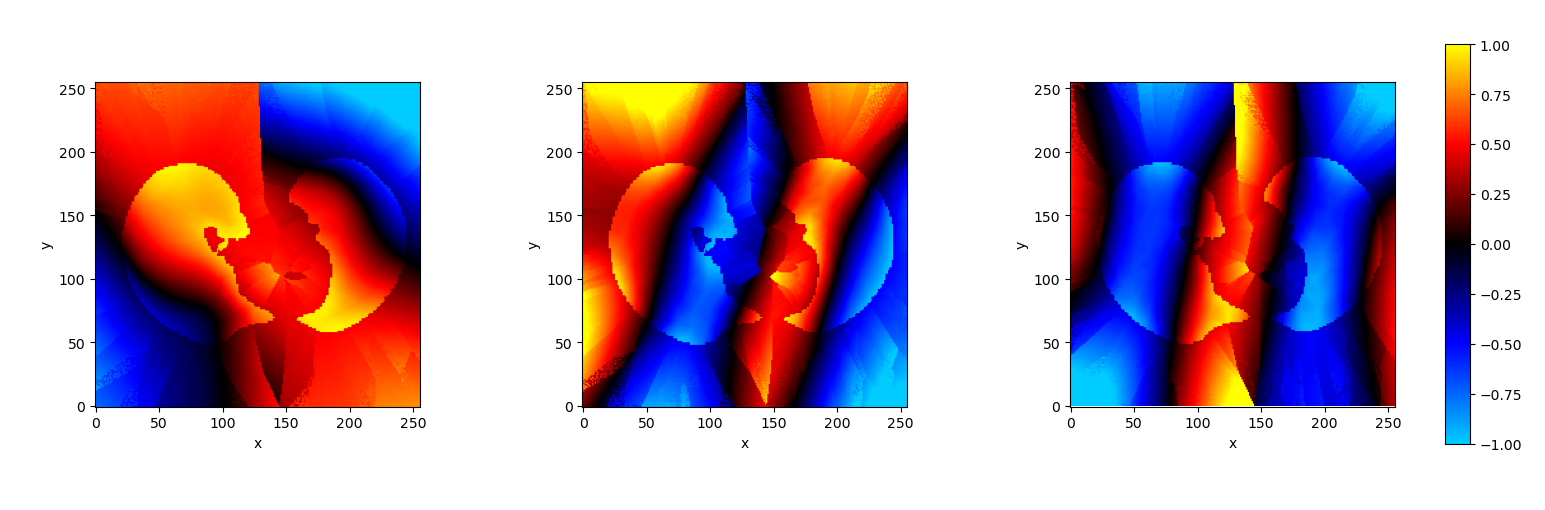

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_true


<IPython.core.display.Javascript object>


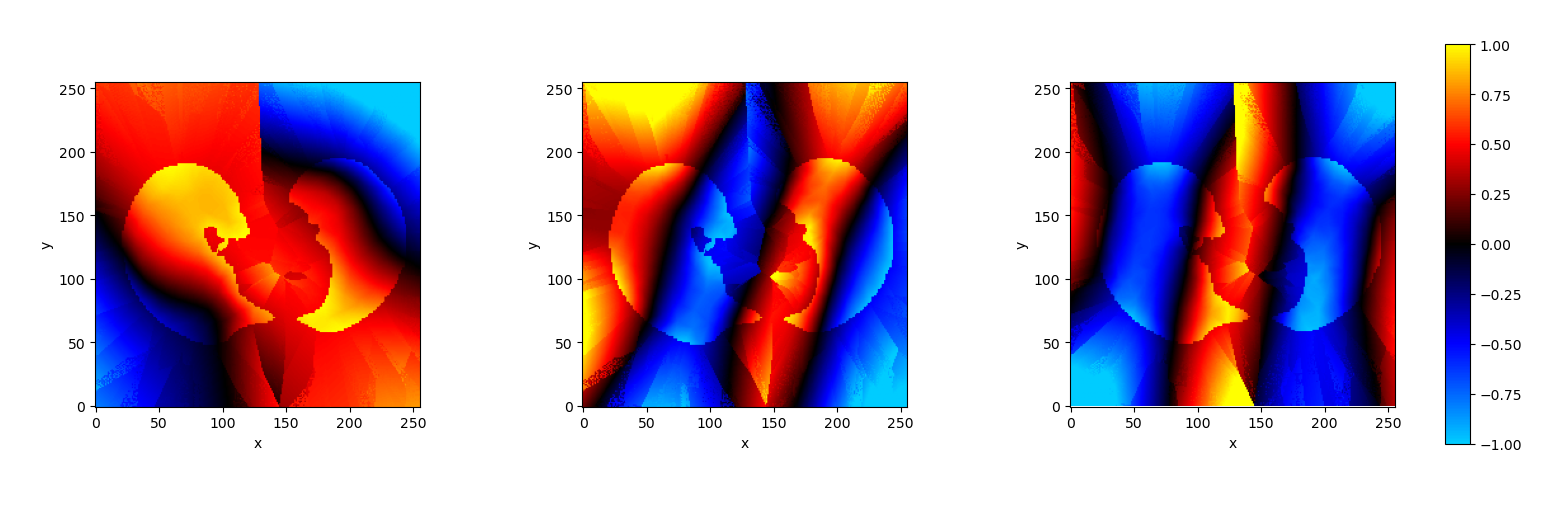

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

1.2213
CPU times: user 2min 21s, sys: 1.75 s, total: 2min 23s
Wall time: 2min 20s


In [60]:
%%time
# test forward pass and initialize viewers
trainer.timer.start()
trainer.run_next_batch(phase='test', epoch=0)

In [45]:
trainer.save_metrics()
trainer.save_viewers()
trainer.save_state()

In [47]:
%%time
trainer.timer.start()
trainer.train(num_epochs=100)

Training...
Epoch 101/200
Running train phase
['phantom38', 'phantom95']..1.1594
['phantom42', 'phantom96']..1.7609
['phantom53', 'phantom60']..3.3807
['phantom92', 'phantom84']..14.4084
['phantom46', 'phantom93']..1.7774
['phantom73', 'phantom31']..3.3829
['phantom48', 'phantom63']..1.1523
['phantom13', 'phantom40']..2.5051
['phantom56', 'phantom39']..5.9278
['phantom44', 'phantom89']..14.9652
['phantom33', 'phantom81']..2.4506
['phantom21', 'phantom27']..0.4126
['phantom29', 'phantom68']..1.2697
['phantom85', 'phantom49']..1.7693
['phantom80', 'phantom94']..11.3625
['phantom76', 'phantom87']..1.6640
['phantom57', 'phantom65']..2.5713
['phantom26', 'phantom77']..1.6475
['phantom20', 'phantom51']..3.0756
['phantom19', 'phantom59']..5.1988
['phantom55', 'phantom52']..1.1698
['phantom83', 'phantom41']..5.0083
['phantom75', 'phantom25']..0.9993
['phantom69', 'phantom99']..1.4783
['phantom78', 'phantom43']..1.4717
['phantom12', 'phantom54']..10.4229
['phantom32', 'phantom11']..1.0652
['pha

['phantom76', 'phantom80']..18.3608
['phantom55', 'phantom83']..1.7560
['phantom71', 'phantom28']..2.0975
['phantom68', 'phantom44']..2.7869
['phantom22', 'phantom52']..1.8333
['phantom25', 'phantom93']..1.2543
['phantom91', 'phantom18']..5.3897
['phantom73', 'phantom45']..2.8600
['phantom69', 'phantom88']..2.3344
['phantom54', 'phantom42']..1.2628
['phantom99', 'phantom11']..1.2441
['phantom63', 'phantom72']..1.6723
['phantom15', 'phantom43']..1.4424
['phantom34', 'phantom74']..0.7345
['phantom33', 'phantom67']..3.5717
['phantom82', 'phantom56']..4.1890
['phantom30', 'phantom46']..2.2633
['phantom65', 'phantom79']..3.9745
['phantom85', 'phantom84']..10.3594
['phantom90', 'phantom58']..2.1378
['phantom13', 'phantom12']..8.0640
['phantom29', 'phantom27']..0.4782
['phantom36', 'phantom75']..1.3056
['phantom23', 'phantom10']..3.0434
['phantom57', 'phantom24']..4.4251
['phantom61', 'phantom70']..7.3647
['phantom62', 'phantom64']..1.7891
['phantom21', 'phantom17']..3.7914
['phantom40', 'pha

['phantom16', 'phantom33']..5.0233
['phantom36', 'phantom93']..1.5026
['phantom79', 'phantom56']..5.8257
['phantom15', 'phantom84']..8.3242
['phantom47', 'phantom98']..3.2349
['phantom12', 'phantom66']..9.6144
['phantom39', 'phantom85']..1.8525
['phantom95', 'phantom28']..1.7460
['phantom54', 'phantom58']..2.1641
['phantom78', 'phantom48']..0.6811
['phantom73', 'phantom72']..1.8054
['phantom34', 'phantom45']..1.8074
['phantom49', 'phantom90']..1.3064
['phantom26', 'phantom21']..0.8726
['phantom83', 'phantom10']..3.5251
['phantom27', 'phantom68']..0.8828
['phantom88', 'phantom22']..2.7995
['phantom57', 'phantom20']..2.6939
['phantom87', 'phantom32']..1.2229
['phantom55', 'phantom14']..2.0636
['phantom18', 'phantom96']..2.3609
['phantom13', 'phantom92']..4.0530
['phantom40', 'phantom86']..2.4658
['phantom62', 'phantom42']..0.6834
['phantom51', 'phantom37']..2.0480
['phantom35', 'phantom31']..3.4482
['phantom44', 'phantom82']..2.1506
['phantom75', 'phantom43']..1.5142
['phantom71', 'phant

['phantom58', 'phantom56']..5.4456
['phantom31', 'phantom96']..3.5039
['phantom60', 'phantom29']..3.0165
['phantom85', 'phantom74']..1.2680
['phantom77', 'phantom73']..2.2023
['phantom99', 'phantom22']..2.0901
['phantom75', 'phantom94']..8.0800
['phantom43', 'phantom50']..2.4985
['phantom12', 'phantom70']..10.4393
['phantom28', 'phantom98']..3.3181
['phantom63', 'phantom72']..1.4263
['phantom90', 'phantom78']..0.8805
['phantom66', 'phantom91']..7.0513
['phantom35', 'phantom80']..8.9428
['phantom53', 'phantom10']..3.6041
['phantom61', 'phantom13']..3.9603
['phantom14', 'phantom93']..2.9502
['phantom88', 'phantom48']..1.7291
['phantom89', 'phantom44']..12.9547
['phantom25', 'phantom64']..1.7797
['phantom33', 'phantom40']..3.9909
['phantom24', 'phantom39']..4.6040
['phantom83', 'phantom38']..1.3262
['phantom46', 'phantom45']..3.4285
['phantom16', 'phantom84']..9.0984
['phantom42', 'phantom87']..0.9544
['phantom11', 'phantom54']..1.0932
['phantom32', 'phantom30']..1.4991
['phantom19', 'pha

['phantom97', 'phantom93']..2.2512
['phantom61', 'phantom74']..3.7210
['phantom50', 'phantom16']..2.2972
['phantom18', 'phantom68']..1.7988
['phantom48', 'phantom33']..2.6097
['phantom80', 'phantom36']..7.9597
['phantom82', 'phantom94']..3.8294
['phantom54', 'phantom98']..2.7922
['phantom58', 'phantom69']..2.1342
['phantom81', 'phantom35']..1.9078
['phantom15', 'phantom85']..1.1726
['phantom13', 'phantom47']..1.2918
['phantom92', 'phantom66']..5.8422
['phantom24', 'phantom63']..4.2766
['phantom46', 'phantom22']..2.3913
['phantom52', 'phantom73']..1.5331
['phantom37', 'phantom14']..2.4124
['phantom56', 'phantom42']..3.8923
['phantom19', 'phantom89']..17.9801
['phantom12', 'phantom57']..7.6060
['phantom65', 'phantom62']..1.8116
['phantom38', 'phantom51']..1.4954
['phantom84', 'phantom77']..9.8797
['phantom76', 'phantom91']..4.6734
['phantom26', 'phantom44']..2.5248
['phantom70', 'phantom67']..4.2274
['phantom60', 'phantom72']..3.0915
['phantom30', 'phantom45']..2.2678
['phantom43', 'phan

['phantom64', 'phantom91']..5.3859
['phantom88', 'phantom24']..4.8433
['phantom92', 'phantom78']..4.2111
['phantom43', 'phantom34']..1.3451
['phantom13', 'phantom97']..1.7834
['phantom53', 'phantom85']..1.9211
['phantom98', 'phantom41']..5.8599
['phantom35', 'phantom14']..3.1245
['phantom69', 'phantom10']..2.8664
['phantom58', 'phantom54']..2.0379
['phantom65', 'phantom57']..2.0823
['phantom71', 'phantom89']..10.7901
['phantom84', 'phantom19']..12.8904
['phantom46', 'phantom47']..2.1235
['phantom82', 'phantom61']..3.8793
['phantom80', 'phantom48']..7.8223
['phantom67', 'phantom76']..2.7613
['phantom40', 'phantom23']..2.3045
['phantom21', 'phantom17']..3.0444
['phantom26', 'phantom44']..2.3818
['phantom59', 'phantom51']..1.6765
['phantom86', 'phantom74']..0.5206
['phantom90', 'phantom75']..0.9528
['phantom83', 'phantom96']..2.4603
['phantom55', 'phantom73']..1.6636
['phantom18', 'phantom27']..0.8981
['phantom52', 'phantom79']..2.4190
['phantom70', 'phantom72']..3.6506
['phantom38', 'pha

['phantom52', 'phantom73']..1.4007
['phantom54', 'phantom19']..6.1221
['phantom65', 'phantom42']..1.4643
['phantom76', 'phantom48']..2.0347
['phantom41', 'phantom44']..6.9304
['phantom43', 'phantom60']..3.7517
['phantom95', 'phantom91']..4.7577
['phantom34', 'phantom93']..1.1811
['phantom68', 'phantom13']..0.9971
['phantom86', 'phantom55']..0.9432
['phantom37', 'phantom10']..3.2250
['phantom61', 'phantom97']..5.5512
['phantom23', 'phantom20']..1.2929
['phantom57', 'phantom27']..0.8382
['phantom36', 'phantom30']..1.6833
['phantom88', 'phantom64']..2.7280
['phantom46', 'phantom82']..1.2330
['phantom18', 'phantom84']..8.1731
['phantom33', 'phantom16']..4.0242
['phantom21', 'phantom25']..1.0716
['phantom96', 'phantom28']..2.3234
['phantom29', 'phantom69']..0.9698
['phantom83', 'phantom51']..2.3041
['phantom87', 'phantom79']..2.3962
['phantom72', 'phantom98']..2.9486
['phantom70', 'phantom49']..3.2527
['phantom40', 'phantom50']..3.1588
['phantom63', 'phantom67']..2.2435
['phantom12', 'phant

['phantom55', 'phantom77']..1.7845
['phantom99', 'phantom25']..1.4489
['phantom16', 'phantom23']..2.0630
['phantom18', 'phantom63']..1.5087
['phantom24', 'phantom14']..5.4222
['phantom38', 'phantom51']..1.5014
['phantom92', 'phantom61']..7.6343
['phantom98', 'phantom67']..3.9699
['phantom52', 'phantom93']..1.3358
['phantom46', 'phantom64']..2.4782
['phantom43', 'phantom70']..3.6795
['phantom89', 'phantom12']..18.1955
['phantom79', 'phantom60']..4.8237
['phantom68', 'phantom90']..1.1392
['phantom59', 'phantom56']..4.7751
['phantom66', 'phantom73']..2.0715
['phantom54', 'phantom42']..0.9312
['phantom33', 'phantom88']..2.7983
['phantom96', 'phantom58']..2.8377
['phantom15', 'phantom81']..0.9711
['phantom28', 'phantom50']..1.5092
['phantom11', 'phantom13']..0.6647
['phantom71', 'phantom86']..1.8963
['phantom21', 'phantom30']..1.2486
['phantom74', 'phantom37']..0.9333
['phantom53', 'phantom31']..2.9909
['phantom26', 'phantom57']..1.2362
['phantom45', 'phantom80']..8.2805
['phantom69', 'phan

['phantom97', 'phantom35']..3.0556
['phantom75', 'phantom78']..0.8008
['phantom93', 'phantom39']..1.6160
['phantom36', 'phantom63']..1.4199
['phantom32', 'phantom21']..0.9396
['phantom66', 'phantom65']..1.9861
['phantom33', 'phantom16']..4.6149
['phantom87', 'phantom55']..1.2414
['phantom77', 'phantom18']..1.9199
['phantom41', 'phantom83']..4.7812
['phantom17', 'phantom84']..9.9678
['phantom48', 'phantom62']..0.6652
['phantom95', 'phantom73']..2.3559
['phantom76', 'phantom64']..2.2728
['phantom59', 'phantom47']..1.6521
['phantom43', 'phantom86']..1.3174
['phantom34', 'phantom58']..1.7980
['phantom82', 'phantom61']..4.1354
['phantom54', 'phantom56']..4.5018
['phantom27', 'phantom94']..3.4630
['phantom14', 'phantom31']..4.4721
['phantom51', 'phantom91']..4.9845
['phantom12', 'phantom29']..6.8462
['phantom57', 'phantom10']..3.3489
['phantom50', 'phantom60']..3.0305
['phantom80', 'phantom44']..11.4813
['phantom98', 'phantom23']..2.5531
['phantom81', 'phantom40']..2.8584
['phantom45', 'phan

['phantom45', 'phantom39']..2.2458
['phantom77', 'phantom43']..2.0742
['phantom72', 'phantom59']..0.8711
['phantom30', 'phantom33']..2.7080
['phantom24', 'phantom37']..4.3266
['phantom67', 'phantom32']..2.0585
['phantom27', 'phantom80']..10.3978
['phantom82', 'phantom49']..1.1231
['phantom65', 'phantom52']..1.5184
['phantom88', 'phantom73']..2.1743
['phantom62', 'phantom16']..2.1065
['phantom84', 'phantom41']..11.8597
['phantom48', 'phantom68']..1.2178
['phantom14', 'phantom53']..3.6028
['phantom34', 'phantom31']..2.0486
['phantom25', 'phantom29']..1.2593
['phantom11', 'phantom81']..1.0140
['phantom36', 'phantom75']..1.1741
['phantom92', 'phantom58']..6.3320
['phantom57', 'phantom95']..1.6619
['phantom10', 'phantom26']..2.8954
['phantom78', 'phantom74']..0.5488
['phantom50', 'phantom23']..1.0042
['phantom20', 'phantom85']..2.0729
['phantom38', 'phantom56']..3.9473
['phantom21', 'phantom12']..7.0811
['phantom71', 'phantom70']..3.5864
['phantom17', 'phantom87']..2.4638
['phantom69', 'pha

['phantom61', 'phantom25']..3.8844
['phantom76', 'phantom16']..2.8709
['phantom79', 'phantom26']..2.3612
['phantom92', 'phantom37']..4.0781
['phantom99', 'phantom83']..1.5235
['phantom69', 'phantom14']..1.9460
['phantom24', 'phantom41']..7.4410
['phantom78', 'phantom58']..1.7075
['phantom22', 'phantom36']..1.8796
['phantom67', 'phantom34']..1.7162
['phantom45', 'phantom55']..1.6799
['phantom21', 'phantom29']..0.6950
['phantom97', 'phantom51']..3.0776
['phantom87', 'phantom43']..1.5834
['phantom15', 'phantom93']..1.0099
['phantom12', 'phantom98']..8.6994
['phantom65', 'phantom18']..1.8748
['phantom11', 'phantom33']..2.6401
['phantom28', 'phantom63']..1.4238
['phantom70', 'phantom80']..9.8008
['phantom39', 'phantom95']..1.5886
['phantom27', 'phantom88']..1.3162
['phantom54', 'phantom94']..3.5350
['phantom64', 'phantom84']..8.8863
['phantom44', 'phantom31']..3.7653
['phantom71', 'phantom96']..3.1165
['phantom81', 'phantom68']..1.3382
['phantom66', 'phantom49']..1.6419
['phantom42', 'phant

['phantom47', 'phantom32']..1.6485
['phantom86', 'phantom53']..1.3332
['phantom62', 'phantom26']..0.8917
['phantom18', 'phantom97']..2.2274
['phantom39', 'phantom30']..1.8114
['phantom48', 'phantom11']..0.6514
['phantom60', 'phantom10']..4.5735
['phantom49', 'phantom59']..1.1394
['phantom92', 'phantom13']..3.8544
['phantom94', 'phantom56']..6.3375
['phantom23', 'phantom15']..0.4985
['phantom42', 'phantom40']..2.4063
['phantom90', 'phantom19']..5.0337
['phantom80', 'phantom25']..6.6540
['phantom17', 'phantom46']..3.2055
['phantom54', 'phantom21']..0.8506
['phantom58', 'phantom36']..1.8957
['phantom35', 'phantom91']..4.6811
['phantom57', 'phantom61']..4.5483
['phantom27', 'phantom71']..1.2778
['phantom64', 'phantom16']..3.3129
['phantom72', 'phantom87']..1.1294
['phantom63', 'phantom22']..2.0131
['phantom45', 'phantom31']..3.1666
['phantom55', 'phantom33']..2.2625
['phantom82', 'phantom67']..1.6600
['phantom52', 'phantom70']..2.8569
['phantom98', 'phantom34']..2.7391
['phantom65', 'phant

['phantom81', 'phantom20']..1.5863
['phantom53', 'phantom91']..4.4071
['phantom79', 'phantom31']..3.4343
['phantom60', 'phantom40']..4.4136
['phantom61', 'phantom70']..5.7748
['phantom71', 'phantom50']..1.7719
['phantom14', 'phantom13']..1.5882
['phantom87', 'phantom67']..1.9371
['phantom19', 'phantom94']..7.6335
['phantom83', 'phantom55']..1.6010
['phantom39', 'phantom30']..1.9576
['phantom21', 'phantom66']..3.0149
['phantom54', 'phantom90']..1.0662
['phantom16', 'phantom52']..2.3572
['phantom97', 'phantom22']..2.7543
['phantom69', 'phantom10']..3.1127
['phantom85', 'phantom68']..1.5152
['phantom89', 'phantom92']..12.3094
['phantom47', 'phantom88']..1.9805
['phantom23', 'phantom32']..0.7969
['phantom43', 'phantom93']..1.7044
['phantom57', 'phantom62']..1.0800
['phantom49', 'phantom51']..2.1633
['phantom82', 'phantom80']..6.6807
['phantom64', 'phantom76']..2.5738
['phantom56', 'phantom37']..4.6470
['phantom35', 'phantom77']..2.4270
['phantom96', 'phantom15']..1.7452
['phantom58', 'phan

KeyboardInterrupt: 

In [61]:
trainer.evaluator.metrics

u_error  u_pred_norm  u_true_norm  \
epoch batch example  phase rep                                         
0     1     phantom7 test  dofs   1.221344  5987.574083  5987.095584   
                           image  0.000346     0.988181     0.995862   

                                  mu_error mu_pred_norm mu_true_norm  \
epoch batch example  phase rep                                         
0     1     phantom7 test  dofs   0.327396  1049.237343  2415.198702   
                           image  0.471641   1278.90686  3893.378906   

                                 mu_true_corr mu_anat_corr true_anat_corr  \
epoch batch example  phase rep                                              
0     1     phantom7 test  dofs      0.535482     0.541099       0.982622   
                           image     0.085074     0.021994       0.413894   

                                 mu_950_corr mu_900_corr mu_850_corr  \
epoch batch example  phase rep                                         
0     1     phantom7 test  dofs          NaN         NaN    -0.02187   
                           image         NaN         NaN         NaN   

                                 true_950_corr true_900_corr true_850_corr  
epoch batch example  phase rep                                              
0     1     phantom7 test  dofs            NaN           NaN     -0.042771  
                           image           NaN           NaN           NaN

In [62]:
trainer.timer.usage

time  gpu_mem_total  \
epoch batch example phase event                                       
0     1     -1      test  get_next_batch    0.538615   5.092894e+10   
                          model_forward     0.098117   5.092894e+10   
             1      test  image_to_dofs     0.040562   5.092894e+10   
                          pde_forward       0.326506   5.092894e+10   
                          dof_metrics       0.080503   5.092894e+10   
                          dofs_to_image   136.950976   5.092894e+10   
                          image_metrics     0.018381   5.092894e+10   
                          update_viewers    2.750905   5.092894e+10   

                                          gpu_mem_reserved  gpu_mem_allocated  \
epoch batch example phase event                                                 
0     1     -1      test  get_next_batch      3.962359e+10       5.164366e+09   
                          model_forward       3.962359e+10       9.869215e+09   
             1      test  image_to_dofs       3.962359e+10       1.027846e+10   
                          pde_forward         3.962359e+10       1.027846e+10   
                          dof_metrics         3.962359e+10       1.027846e+10   
                          dofs_to_image       3.962359e+10       1.047664e+10   
                          image_metrics       3.962359e+10       1.047664e+10   
                          update_viewers      3.962359e+10       1.055057e+10   

                                             mem_total      mem_used  
epoch batch example phase event                                       
0     1     -1      test  get_next_batch  5.408796e+11  1.984918e+10  
                          model_forward   5.408796e+11  1.984918e+10  
             1      test  image_to_dofs   5.408796e+11  1.984918e+10  
                          pde_forward     5.408796e+11  1.984918e+10  
                          dof_metrics     5.408796e+11  1.984923e+10  
                          dofs_to_image   5.408796e+11  1.984923e+10  
                          image_metrics   5.408796e+11  1.984923e+10  
                          update_viewers  5.408796e+11  2.020600e+10

In [63]:
trainer.timer.usage.groupby(['phase', 'event']).mean().sort_values('time')

time  gpu_mem_total  gpu_mem_reserved  \
phase event                                                         
test  image_metrics     0.018381   5.092894e+10      3.962359e+10   
      image_to_dofs     0.040562   5.092894e+10      3.962359e+10   
      dof_metrics       0.080503   5.092894e+10      3.962359e+10   
      model_forward     0.098117   5.092894e+10      3.962359e+10   
      pde_forward       0.326506   5.092894e+10      3.962359e+10   
      get_next_batch    0.538615   5.092894e+10      3.962359e+10   
      update_viewers    2.750905   5.092894e+10      3.962359e+10   
      dofs_to_image   136.950976   5.092894e+10      3.962359e+10   

                      gpu_mem_allocated     mem_total      mem_used  
phase event                                                          
test  image_metrics        1.047664e+10  5.408796e+11  1.984923e+10  
      image_to_dofs        1.027846e+10  5.408796e+11  1.984918e+10  
      dof_metrics          1.027846e+10  5.408796e+11  1.984923e+10  
      model_forward        9.869215e+09  5.408796e+11  1.984918e+10  
      pde_forward          1.027846e+10  5.408796e+11  1.984918e+10  
      get_next_batch       5.164366e+09  5.408796e+11  1.984918e+10  
      update_viewers       1.055057e+10  5.408796e+11  2.020600e+10  
      dofs_to_image        1.047664e+10  5.408796e+11  1.984923e+10

<IPython.core.display.Javascript object>


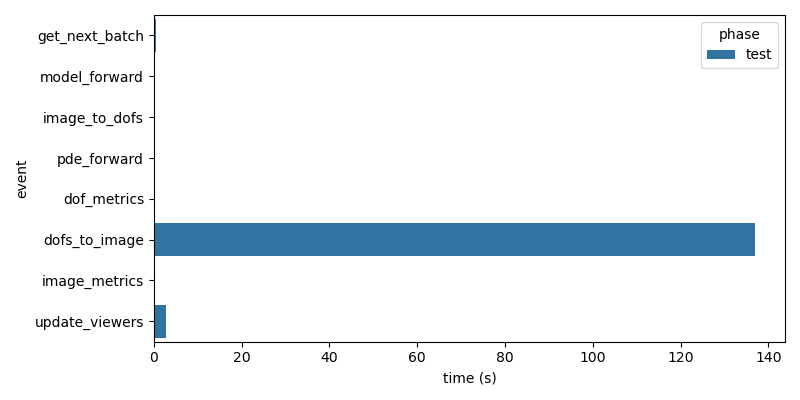

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage, y='event', x='time', hue='phase', estimator='mean', ax=ax)
ax.set_xlabel('time (s)')
fig.tight_layout()

<IPython.core.display.Javascript object>


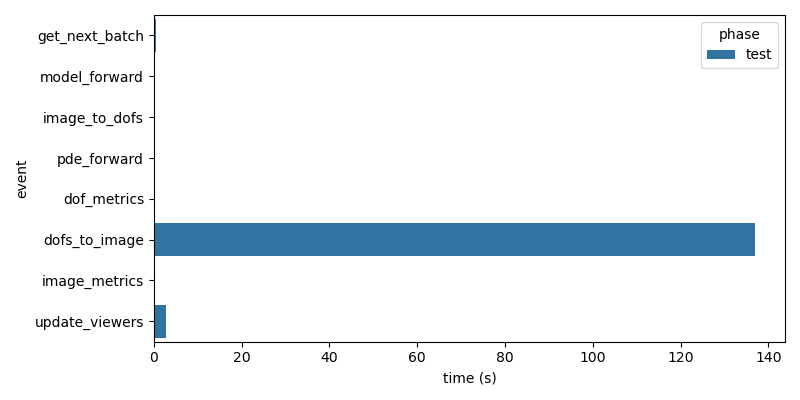

In [67]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage , y='event', x='time', hue='phase', estimator='sum', ax=ax)
#ax.set_xscale('log')
ax.set_xlabel('time (s)')
fig.tight_layout()

<IPython.core.display.Javascript object>


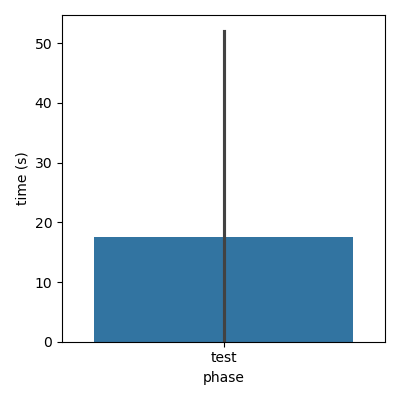

In [68]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='mean', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

<IPython.core.display.Javascript object>


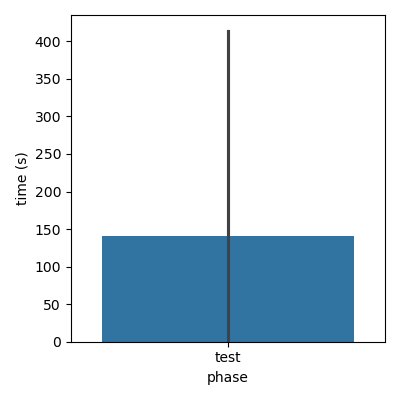

In [69]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='sum', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

In [144]:
anat_image, mu_true_image, u_image, mask, resolution, pde, points, radius, example_name = test_data[5]
anat_image.shape

torch.Size([1, 256, 256, 94])

In [145]:
mu_pred_image = model.forward(anat_image.unsqueeze(0).cuda())[0].cpu() * 1000
mask.shape, mask.max()

(torch.Size([1, 256, 256, 94]), tensor(6.))

In [146]:
import torch

tensor(0.4589, grad_fn=<MedianBackward0>)
anat


<IPython.core.display.Javascript object>


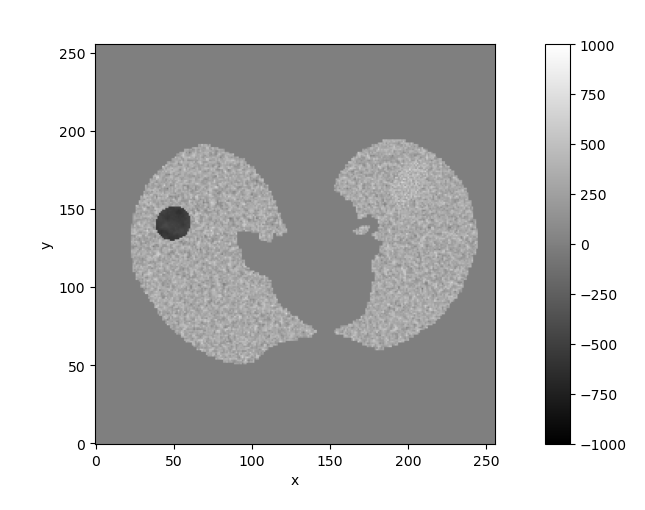

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

mu_pred


<IPython.core.display.Javascript object>


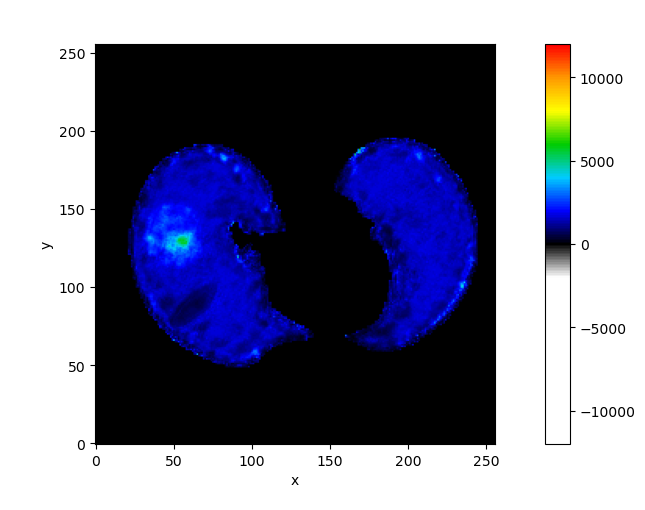

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

mu_true


<IPython.core.display.Javascript object>


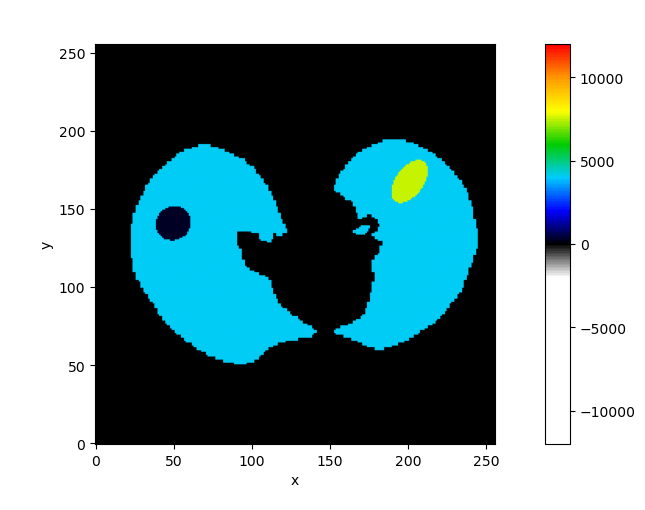

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

c_pred


<IPython.core.display.Javascript object>


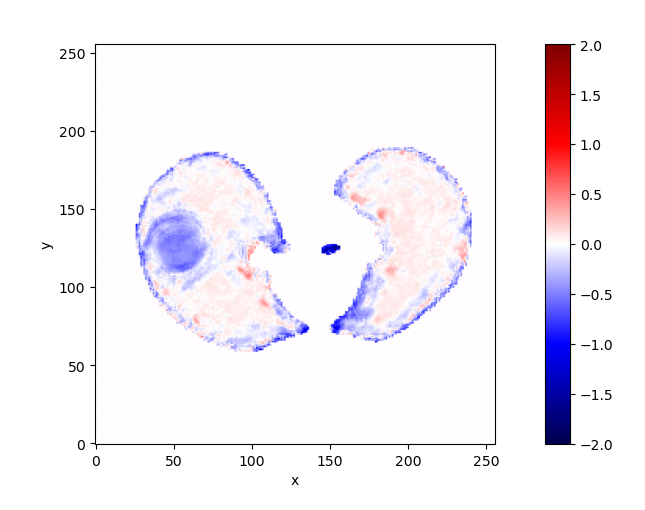

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

c_true


<IPython.core.display.Javascript object>


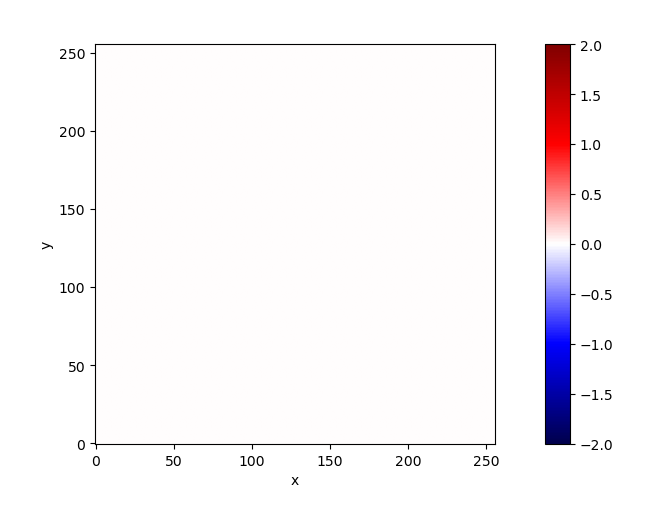

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

cte


<IPython.core.display.Javascript object>


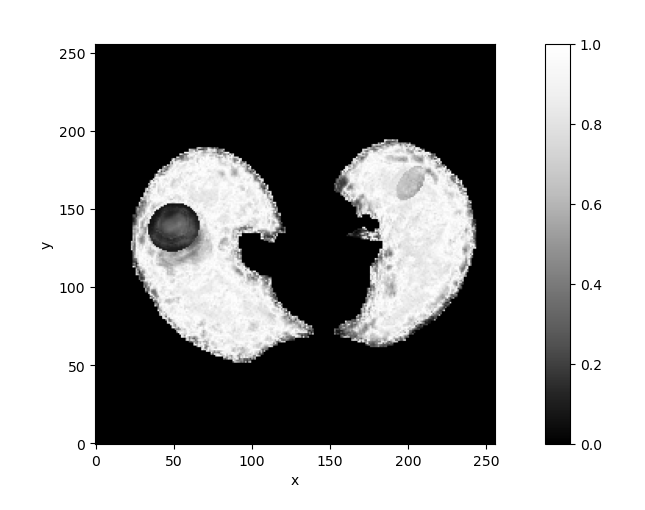

interactive(children=(SelectionSlider(description='c', options=((0, 0),), value=0), SelectionSlider(descriptio…

In [147]:
%autoreload

c_pred_image = torch.log10( mu_pred_image / mu_pred_image[mask == 1].median() + 1e-6 )
c_true_image = torch.log10( mu_true_image / mu_true_image[mask == 1].median() + 1e-6 )
cte_image = 10**-(c_pred_image - c_true_image).abs()

print(cte_image[mask > 1].median())

z = 30
project.visual.XArrayViewer(
    project.utils.as_xarray(anat_image * (mask > 0), dims=['c', 'x', 'y', 'z'], name='anat')
).update_index(c=0, z=z)
project.visual.XArrayViewer(
    project.utils.as_xarray(mu_pred_image * (mask > 0), dims=['c', 'x', 'y', 'z'], name='mu_pred')
).update_index(c=0, z=z)
project.visual.XArrayViewer(
    project.utils.as_xarray(mu_true_image * (mask > 0), dims=['c', 'x', 'y', 'z'], name='mu_true')
).update_index(c=0, z=z)
project.visual.XArrayViewer(
    project.utils.as_xarray( (c_pred_image) * (mask > 0), dims=['c', 'x', 'y', 'z'], name='c_pred'), vmin=-2, vmax=2
).update_index(c=0, z=z)
project.visual.XArrayViewer(
    project.utils.as_xarray( (c_true_image) * (mask > 0), dims=['c', 'x', 'y', 'z'], name='c_true'), vmin=-2, vmax=2
).update_index(c=0, z=z)
project.visual.XArrayViewer(
    project.utils.as_xarray( (cte_image) * (mask > 0), dims=['c', 'x', 'y', 'z'], name='cte'), vmin=0, vmax=1, cmap='Greys_r'
).update_index(c=0, z=z)